In [1]:
from keras.datasets import cifar10
from keras.callbacks import EarlyStopping
from keras.utils.np_utils import to_categorical
from devol import DEvol, GenomeHandler
import numpy as np
from keras import backend as K
import matplotlib.pyplot as plt
import scipy

Using TensorFlow backend.


In [2]:
K.set_image_data_format("channels_last")

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = y_train[:,0]
y_test = y_test[:,0]
print("data shapes")
print("  x train:", x_train.shape)
print("  x test:", x_test.shape)
print("  y train:", y_train.shape)
print("  y test:", y_test.shape)
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
dataset = ((x_train, y_train), (x_test, y_test))

data shapes
  x train: (50000, 32, 32, 3)
  x test: (10000, 32, 32, 3)
  y train: (50000,)
  y test: (10000,)


## Analysis of evolutional CNN

In [3]:
max_conv_layers = 6
max_dense_layers = 3 # including final softmax layer
max_conv_kernels = 64
max_dense_nodes = 1024
input_shape = (32,32,3)
num_classes = 10
num_generations = 50
population_size = 50
num_epochs = 10

In [4]:
# View experiment result based on index
experiment = 7

In [6]:
#batch=true, dropout=true, activ=[relu, sigmoid]
if experiment == 1:
    datafile = "Sun Oct 29 15:41:54 2017.csv"
    genome_handler = GenomeHandler(max_conv_layers, max_dense_layers, max_conv_kernels, \
                    max_dense_nodes, input_shape, num_classes, \
                    batch_normalization=True, dropout=True, max_pooling=True, \
                optimizers=None, activations=None)
    
#batch=false, dropout=false, activ=[relu,sigmoid]
elif experiment == 2:
    datafile = "Sat Oct 28 20:48:00 2017.csv"
    genome_handler = GenomeHandler(max_conv_layers, max_dense_layers, max_conv_kernels, \
                    max_dense_nodes, input_shape, num_classes, \
                    batch_normalization=False, dropout=False, max_pooling=True, \
                optimizers=None, activations=None)
    
#batch=false, dropout=false, activ=[sigmoid]
elif experiment == 3:
    datafile = "Sun Oct 29 18:06:26 2017.csv" 
    genome_handler = GenomeHandler(max_conv_layers, max_dense_layers, max_conv_kernels, \
                    max_dense_nodes, input_shape, num_classes, \
                    batch_normalization=False, dropout=False, max_pooling=True, \
                optimizers=None, activations=["sigmoid"])

#batch=false, dropout=false, activ=[relu]    
elif experiment == 4:
    datafile = "Sun Oct 29 20:00:59 2017.csv"
    genome_handler = GenomeHandler(max_conv_layers, max_dense_layers, max_conv_kernels, \
                    max_dense_nodes, input_shape, num_classes, \
                    batch_normalization=False, dropout=False, max_pooling=True, \
                optimizers=None, activations=["relu"])

elif experiment == 5:
    datafile = "Thu Nov  9 23:50:33 2017.csv"
    genome_handler = GenomeHandler(max_conv_layers, max_dense_layers, max_conv_kernels, \
                    max_dense_nodes, input_shape, num_classes, \
                    batch_normalization=True, dropout=True, max_pooling=True, \
                optimizers=None, activations=["relu"])
    
elif experiment == 6:
    datafile = "Tue Nov 21 01:41:00 2017.csv"
    genome_handler = GenomeHandler(max_conv_layers, max_dense_layers, max_conv_kernels, \
                    max_dense_nodes, input_shape, num_classes, \
                    batch_normalization=True, dropout=True, max_pooling=True, \
                optimizers=None, activations=["relu"])
    
elif experiment == 7:
    datafile = "Tue Nov 21 12:59:01 2017.csv"
    genome_handler = GenomeHandler(max_conv_layers, max_dense_layers, max_conv_kernels, \
                    max_dense_nodes, input_shape, num_classes, \
                    batch_normalization=True, dropout=True, max_pooling=True, \
                optimizers=None, activations=["relu"])

# Using current setting    
else:
    print("Select a experiment")
data = np.genfromtxt(datafile, delimiter=",")
data = data[1:]
#print(data.shape)
accuracy = []
for row in data:
    accuracy.append(row[-1])
running_max = scipy.maximum.accumulate(accuracy)
accuracy = np.array(accuracy)


In [7]:
best_model = genome_handler.decode_best(datafile)
best_model.summary()
print("accuracy: {}%".format(max(accuracy)*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 16)        9232      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 16)        64        
__________

In [8]:
train_epochs = 20
loss, acc = None, None
best_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=train_epochs, verbose=1)
loss, acc = best_model.evaluate(x_test, y_test, verbose=0)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 28s - loss: 1.4694 - acc: 0.5043 - val_loss: 1.3332 - val_acc: 0.5233
Epoch 2/20
50000/50000 [==============================] - 25s - loss: 0.9972 - acc: 0.6473 - val_loss: 1.0731 - val_acc: 0.6361
Epoch 3/20
50000/50000 [==============================] - 25s - loss: 0.8217 - acc: 0.7093 - val_loss: 0.9569 - val_acc: 0.6689
Epoch 4/20
50000/50000 [==============================] - 25s - loss: 0.7026 - acc: 0.7533 - val_loss: 0.8316 - val_acc: 0.7173
Epoch 5/20
50000/50000 [==============================] - 25s - loss: 0.6061 - acc: 0.7859 - val_loss: 0.8487 - val_acc: 0.7089
Epoch 6/20
50000/50000 [==============================] - 25s - loss: 0.5249 - acc: 0.8169 - val_loss: 0.8355 - val_acc: 0.7129
Epoch 7/20
50000/50000 [==============================] - 25s - loss: 0.4538 - acc: 0.8414 - val_loss: 0.7770 - val_acc: 0.7331
Epoch 8/20
50000/50000 [==============================

### Running max of accuracy across generations

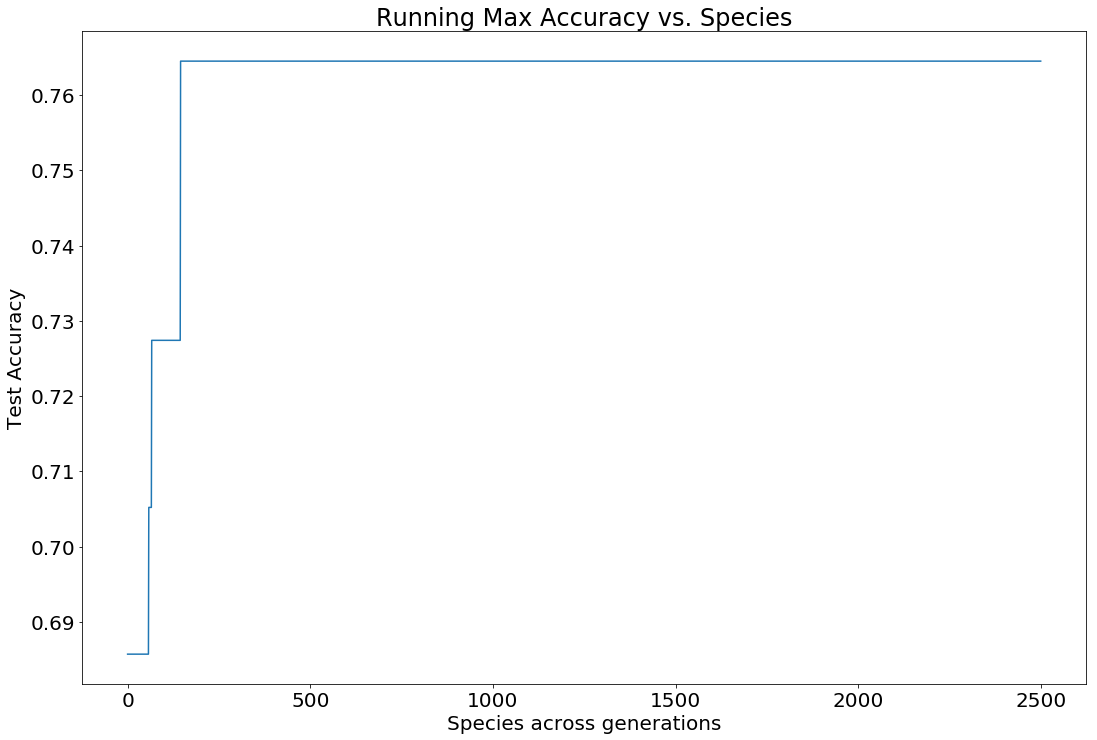

In [9]:
plt.figure(1)
plt.plot(range(len(running_max)), running_max)
plt.title('Running Max Accuracy vs. Species', fontsize=24)
plt.xlabel('Species across generations',fontsize=20)
plt.ylabel('Test Accuracy',fontsize=20)
plt.tick_params(labelsize=20)

fig = plt.gcf()
fig.set_size_inches(18, 12)
plt.savefig('plot/runningmax_'+ str(experiment) +'.png')
plt.show()

### Accuracy scattered across generations

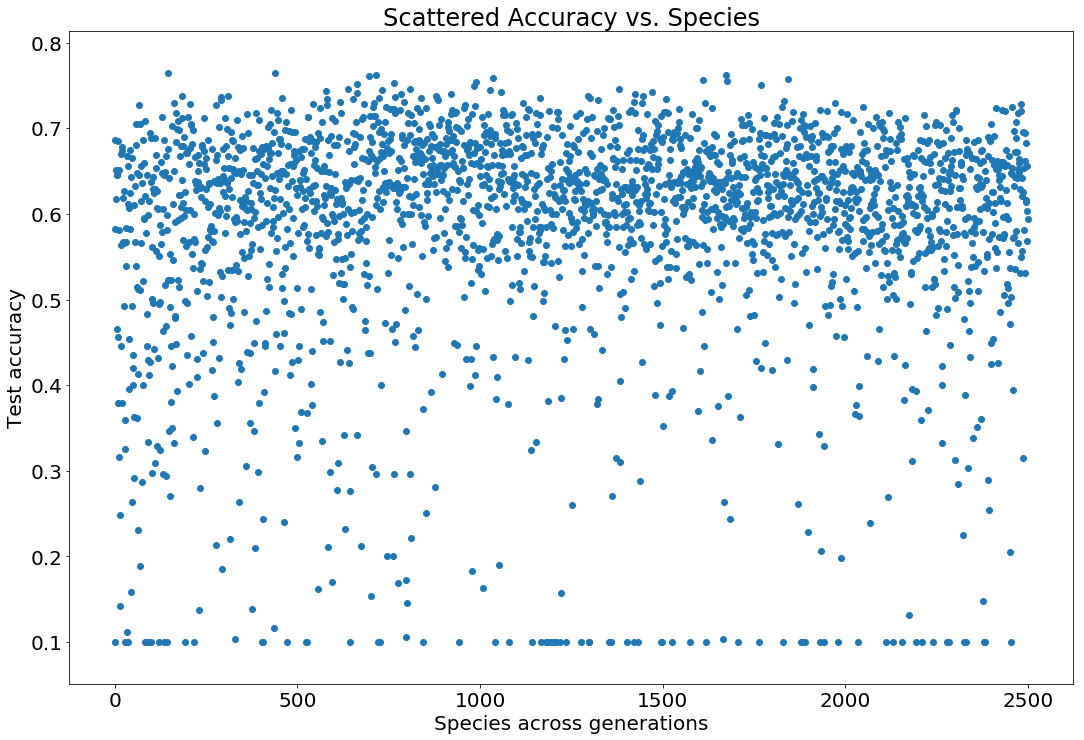

In [10]:
plt.figure(2)
plt.scatter(range(len(accuracy)), accuracy)
plt.title('Scattered Accuracy vs. Species', fontsize=24)
plt.xlabel('Species across generations',fontsize=20)
plt.ylabel('Test accuracy',fontsize=20)
plt.tick_params(labelsize=20)

fig = plt.gcf()
fig.set_size_inches(18, 12)
plt.savefig('plot/accuracy_' + str(experiment) +'.png')
plt.show()

### Mean and standard deviation of accuracies per generation 

In [11]:
num_generations

50

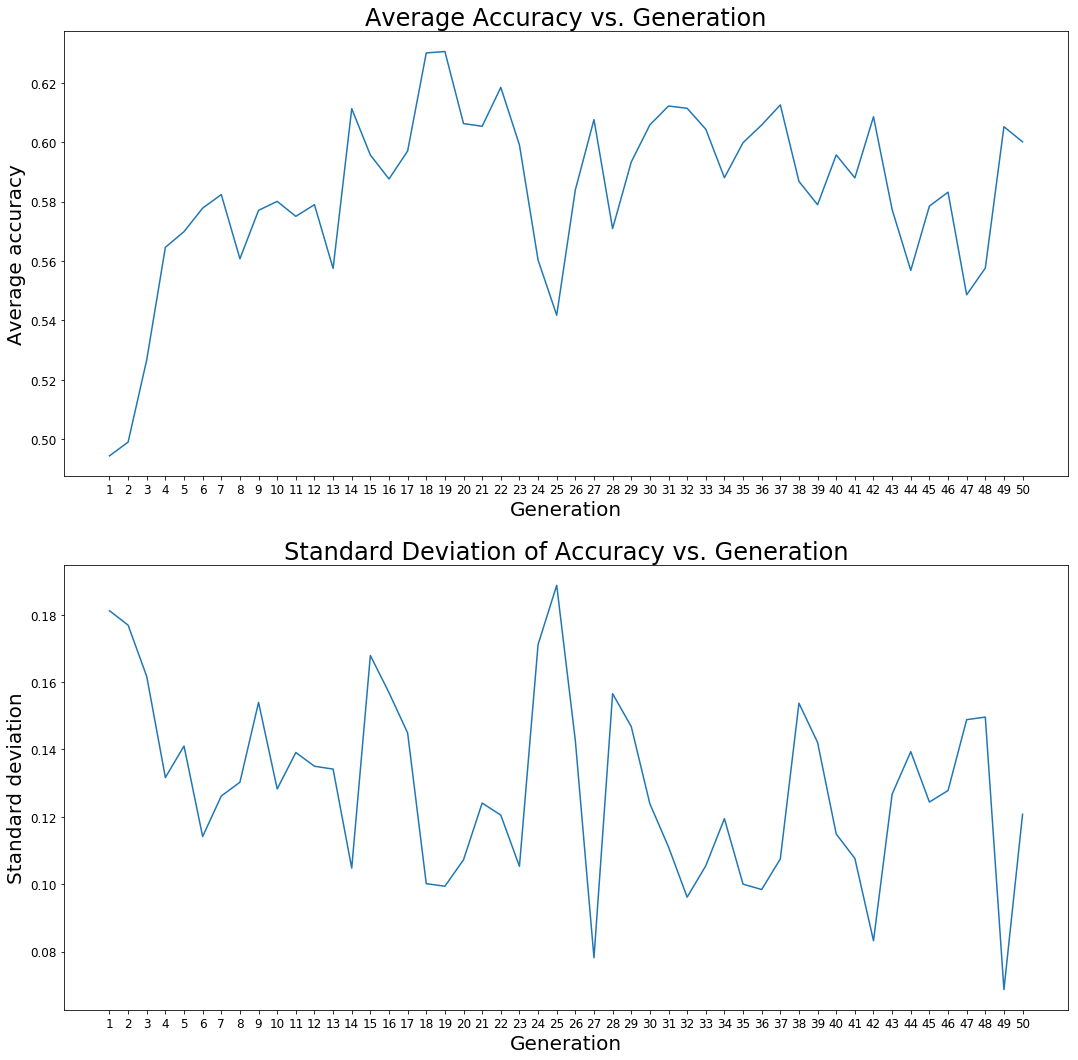

In [13]:
accuracy_per_gen = np.split(accuracy, num_generations)
average_per_gen = []
std_dev_per_gen = []
for item in accuracy_per_gen:
    average = np.mean(item)
    std_dev = np.std(item)
    average_per_gen.append(average)
    std_dev_per_gen.append(std_dev)

plt.figure(3)
plt.subplot(2, 1, 1)
plt.plot(range(1,num_generations+1), average_per_gen)
plt.title('Average Accuracy vs. Generation', fontsize=24)
plt.xlabel('Generation',fontsize=20)
plt.ylabel('Average accuracy',fontsize=20)
plt.tick_params(labelsize=12)
plt.xticks(np.arange(1, num_generations+1, 1))


plt.subplot(2, 1, 2)
plt.plot(range(1,num_generations+1), std_dev_per_gen)
plt.title('Standard Deviation of Accuracy vs. Generation', fontsize=24)
plt.xlabel('Generation',fontsize=20)
plt.ylabel('Standard deviation',fontsize=20)
plt.tick_params(labelsize=12)
plt.xticks(np.arange(1, num_generations+1, 1))


fig = plt.gcf()
fig.set_size_inches(18, 18)
plt.savefig('plot/mean_std_' + str(experiment) +'.png')
plt.show()
#print(average_per_gen)

### Accuracy scattered based on network structures across generations
Note that a network has at least 1 convolutional layer and 1 dense layer

In [14]:
# Sort the accuracy data points based on the network structure

layer6=[]   # Network with 3(maximum) convolutional layers and 2(maximum) dense layers
layer5=[]   # Network with 3(maximum) convolutional layers and 1 dense layers
layer4=[]   # Network with 2 convolutional layers and 2(maximum) dense layers
layer3=[]   # Network with 2 convolutional layers and 1 dense layers
layer2=[]   # Network with 1 convolutional layers and 1 dense layers
layer1=[]   # Network with 1 convolutional layers and 1 dense layers

gen = 1
pop = 0
index = [0,6,12,18,24,30]
for row in data:
    pop += 1
    if pop > population_size:
        gen += 1
        pop = 1
    if sum(row[index]) == 6:
        layer6.append((gen,row[-1]))
    elif sum(row[index]) == 5:
        layer5.append((gen,row[-1]))
    elif sum(row[index]) == 4:
        layer4.append((gen,row[-1]))
    elif sum(row[index]) == 3:
        layer3.append((gen,row[-1]))
    elif sum(row[index]) == 2:
        layer2.append((gen,row[-1]))

    else:
        layer1.append((gen,row[-1]))
print(len(layer6))
print(len(layer5))
print(len(layer4))
print(len(layer3))
print(len(layer2))
print(len(layer1))


48
193
472
866
698
223


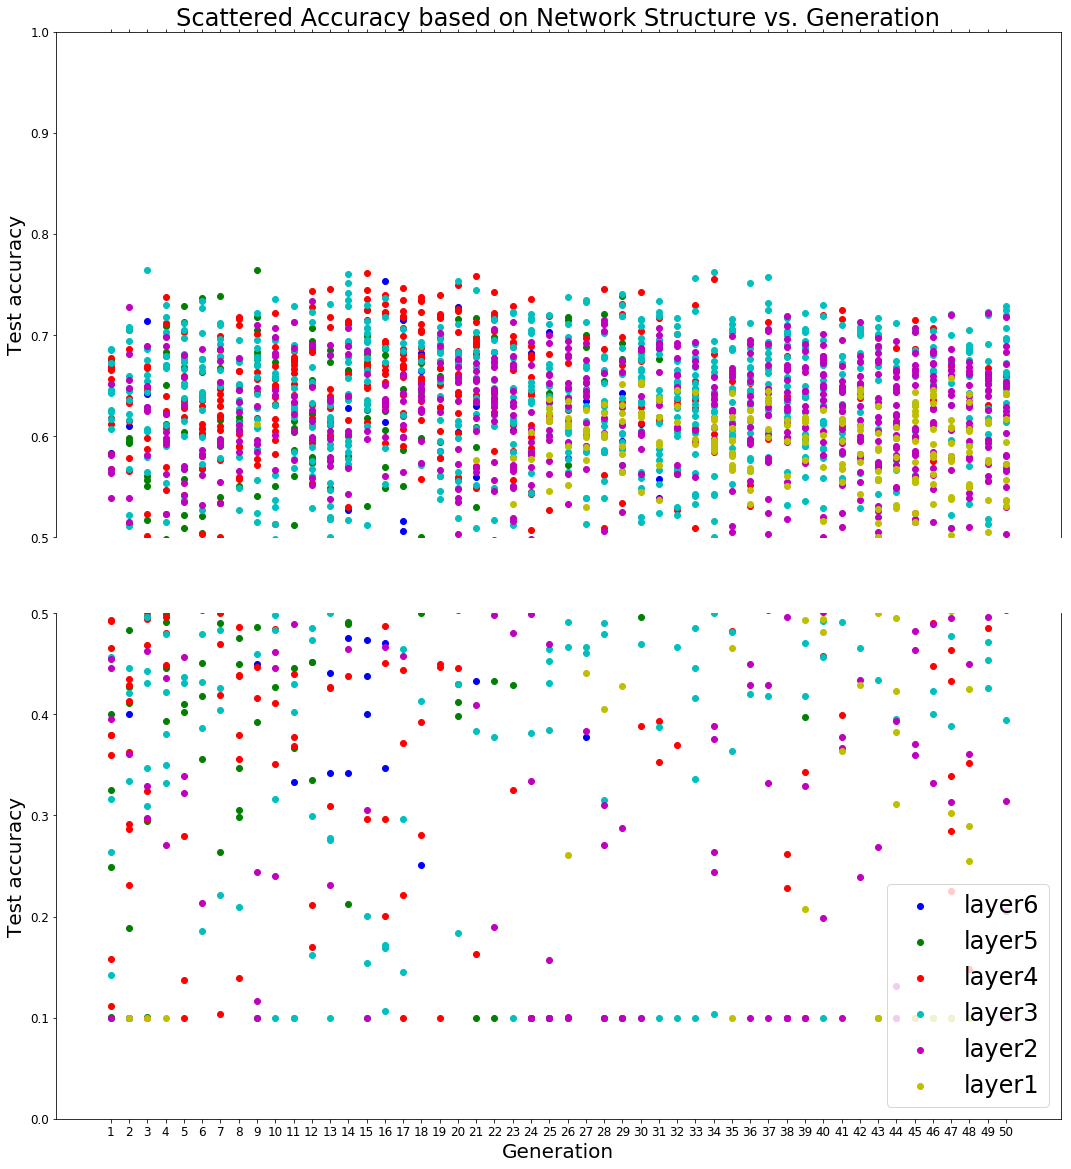

In [15]:
plt.figure(4)

colors = ['b', 'g', 'r', 'c', 'm', 'y']
x1,y1 = zip(*layer6)
x2,y2 = zip(*layer5)
x3,y3 = zip(*layer4)
x4,y4 = zip(*layer3)
x5,y5 = zip(*layer2)
x6,y6 = zip(*layer1)



f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
ax.scatter(x1,y1,color=colors[0])
ax.scatter(x2,y2,color=colors[1])
ax.scatter(x3,y3,color=colors[2])
ax.scatter(x4,y4,color=colors[3])
ax.scatter(x5,y5,color=colors[4])
ax.scatter(x6,y6,color=colors[5])

layer_6 = ax2.scatter(x1,y1,color=colors[0])
layer_5 = ax2.scatter(x2,y2,color=colors[1])
layer_4 = ax2.scatter(x3,y3,color=colors[2])
layer_3 = ax2.scatter(x4,y4,color=colors[3])
layer_2 = ax2.scatter(x5,y5,color=colors[4])
layer_1 = ax2.scatter(x6,y6,color=colors[5])

ax.set_ylim(.5, 1.)  # outliers only
ax2.set_ylim(0., .5)  # most of the data
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop='off')  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
f.subplots_adjust(hspace=0.15)

ax2.legend((layer_6, layer_5, layer_4, layer_3, layer_2, layer_1),
           ('layer6', 'layer5', 'layer4', 'layer3', 'layer2', 'layer1'),
           scatterpoints=1,
           loc='lower right',
           ncol=1,
           fontsize=24)

ax.set_title('Scattered Accuracy based on Network Structure vs. Generation', fontsize=24)
ax2.set_xlabel('Generation',fontsize=20)
ax.set_ylabel('Test accuracy',fontsize=20)
ax2.set_ylabel('Test accuracy',fontsize=20)

ax.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)

ax2.xaxis.set_ticks(np.arange(1, num_generations+1, 1))

fig = plt.gcf()
fig.set_size_inches(18, 20)
plt.savefig('plot/accuracy_structure_' + str(experiment) +'.png')
plt.show()

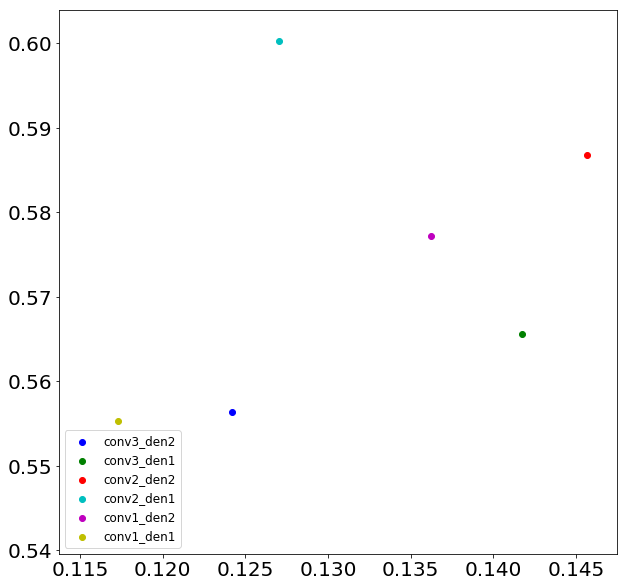

In [17]:
plt.figure(5)

conv3den2_avg = np.mean(y1)
conv3den2_std = np.std(y1)
conv3den1_avg = np.mean(y2)
conv3den1_std = np.std(y2)
conv2den2_avg = np.mean(y3)
conv2den2_std = np.std(y3)
conv2den1_avg = np.mean(y4)
conv2den1_std = np.std(y4)
conv1den2_avg = np.mean(y5)
conv1den2_std = np.std(y5)
conv1den1_avg = np.mean(y6)
conv1den1_std = np.std(y6)

plt.scatter(conv3den2_std,conv3den2_avg,color=colors[0])
plt.scatter(conv3den1_std,conv3den1_avg,color=colors[1])
plt.scatter(conv2den2_std,conv2den2_avg,color=colors[2])
plt.scatter(conv2den1_std,conv2den1_avg,color=colors[3])
plt.scatter(conv1den2_std,conv1den2_avg,color=colors[4])
plt.scatter(conv1den1_std,conv1den1_avg,color=colors[5])

plt.legend(('conv3_den2', 'conv3_den1', 'conv2_den2', 'conv2_den1', 'conv1_den2', 'conv1_den1'),
           scatterpoints=1,
           loc='lower left',
           ncol=1,
           fontsize=12)

plt.tick_params(labelsize=20)

fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.savefig('plot/mean_std_structure_' + str(experiment) +'.png')
plt.show()
